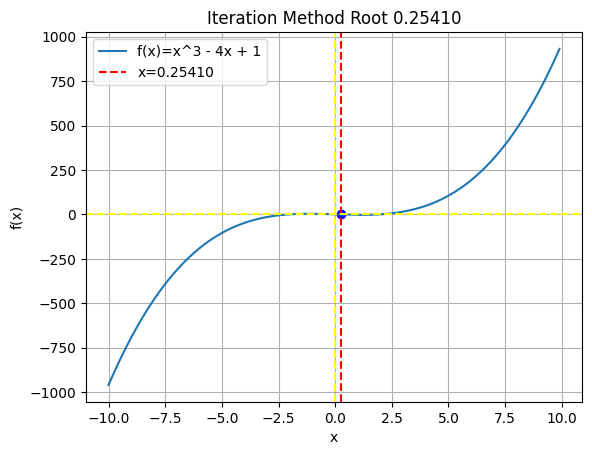

In [53]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**3 -4*x + 1
def g(x):
    return (x**3+1)/4
def iteration_method(g,x,tol=1e-5,max_iter=100):
    for i in range(max_iter):
        x_new = g(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    raise ValueError("No convergence")

root = iteration_method(g,1)

x= np.arange(-10,10,0.1)

plt.plot(x,f(x),label='f(x)=x^3 - 4x + 1')
plt.scatter(root,f(root),color='blue')
plt.axvline(root,color='red',linestyle='--',label=f'x={root:.5f}')

plt.axvline(0,color='yellow',linestyle='--')
plt.axhline(0,color='yellow',linestyle='--')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Iteration Method Root {root:.5f}')
plt.legend()
plt.grid(True)